In [19]:
import platform
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [20]:
firestaion = pd.read_csv('/Users/hankiho/Desktop/Data/전국 119안전센터 현황.csv', encoding = 'CP949')
firestaion.head(5)

,순번,시도본부,소방서,119안전센터명,주소,전화번호
0,1,서울소방재난본부,종로소방서,세종로,서울특별시 종로구 종로1길 28 (수송동),02-734-0119
1,2,서울소방재난본부,종로소방서,신교,서울특별시 종로구 자하문로 93 (신교동),02-736-0119
2,3,서울소방재난본부,종로소방서,종로,서울특별시 종로구 돈화문로 30 (묘동),02-764-0119
3,4,서울소방재난본부,종로소방서,연건,서울특별시 종로구 대학로 91 (연건동),02-762-0119
4,5,서울소방재난본부,종로소방서,신영,서울특별시 종로구 진흥로 477 (신영동),02-391-0119


In [31]:
firestaion.columns

Index(['시도본부', '소방서', '119안전센터명', '주소'], dtype='object')

In [41]:
firestaion = firestaion[["시도본부","소방서","119안전센터명","주소"]]
firestaion.head(5)

,시도본부,소방서,119안전센터명,주소
0,서울소방재난본부,종로소방서,세종로,서울특별시 종로구 종로1길 28 (수송동)
1,서울소방재난본부,종로소방서,신교,서울특별시 종로구 자하문로 93 (신교동)
2,서울소방재난본부,종로소방서,종로,서울특별시 종로구 돈화문로 30 (묘동)
3,서울소방재난본부,종로소방서,연건,서울특별시 종로구 대학로 91 (연건동)
4,서울소방재난본부,종로소방서,신영,서울특별시 종로구 진흥로 477 (신영동)


In [47]:
firestation_seoul = firestaion.loc[firestaion["시도본부"] == "서울소방재난본부"]
firestation_seoul.head(5)

,시도본부,소방서,119안전센터명,주소
0,서울소방재난본부,종로소방서,세종로,서울특별시 종로구 종로1길 28 (수송동)
1,서울소방재난본부,종로소방서,신교,서울특별시 종로구 자하문로 93 (신교동)
2,서울소방재난본부,종로소방서,종로,서울특별시 종로구 돈화문로 30 (묘동)
3,서울소방재난본부,종로소방서,연건,서울특별시 종로구 대학로 91 (연건동)
4,서울소방재난본부,종로소방서,신영,서울특별시 종로구 진흥로 477 (신영동)


In [48]:
firestation_seoul['시군구']= ''
firestation_seoul.head(5)

/Users/hankiho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,시도본부,소방서,119안전센터명,주소,시군구
0,서울소방재난본부,종로소방서,세종로,서울특별시 종로구 종로1길 28 (수송동),
1,서울소방재난본부,종로소방서,신교,서울특별시 종로구 자하문로 93 (신교동),
2,서울소방재난본부,종로소방서,종로,서울특별시 종로구 돈화문로 30 (묘동),
3,서울소방재난본부,종로소방서,연건,서울특별시 종로구 대학로 91 (연건동),
4,서울소방재난본부,종로소방서,신영,서울특별시 종로구 진흥로 477 (신영동),


In [49]:
firestation_seoul['주소'].values[33].split()[1] #[6:9] 이런식으로 나누면 영등포구같은 4글자는 영등포만 나오기떄문에 split() 함수를 사용

'영등포구'

In [50]:
for n in np.arange(len(firestation_seoul)):
    firestation_seoul['시군구'].values[n] = firestation_seoul['주소'].values[n].split()[1]
firestation_seoul.head(5)    

,시도본부,소방서,119안전센터명,주소,시군구
0,서울소방재난본부,종로소방서,세종로,서울특별시 종로구 종로1길 28 (수송동),종로구
1,서울소방재난본부,종로소방서,신교,서울특별시 종로구 자하문로 93 (신교동),종로구
2,서울소방재난본부,종로소방서,종로,서울특별시 종로구 돈화문로 30 (묘동),종로구
3,서울소방재난본부,종로소방서,연건,서울특별시 종로구 대학로 91 (연건동),종로구
4,서울소방재난본부,종로소방서,신영,서울특별시 종로구 진흥로 477 (신영동),종로구


In [51]:
firestation_seoul = firestation_seoul['시군구'].value_counts()
firestation_seoul = firestation_seoul.sort_index()
df_firestation_seoul = pd.DataFrame(firestation_seoul)
df_firestation_seoul.head(5)
#firestation_seoul.head(5)
#unique() 중복 값 제거하고 유일한 값만 반환
#f = firestation_seoul.sort_index() 가나다순
#DataFrame(data, columns= ['year','pop','state']) #순서 바꾸기

,시군구
강남구,5
강동구,5
강북구,4
강서구,5
관악구,4


In [13]:
firestation_seoul = firestation_seoul.sort_index()

In [14]:
시군구 = firestation_seoul.index

In [16]:
소방서갯수 = list(firestation_seoul)

In [17]:
소방서갯수

[5, 5, 4, 5, 4, 3, 6, 2, 5, 4, 5, 4, 6, 4, 6, 4, 4, 6, 5, 5, 5, 4, 6, 5, 4]

In [16]:
firestation_seoul = {'시군구':시군구,
                     '소방서갯수':소방서갯수}

In [17]:
firestation_seoul = DataFrame(firestation_seoul, columns = ['시군구','소방서갯수'])
firestation_seoul.head(5)

,시군구,소방서갯수
0,강남구,5
1,강동구,5
2,강북구,4
3,강서구,5
4,관악구,4


In [53]:
factory = pd.read_excel('/Users/hankiho/Desktop/Data/0. 공장 정보 데이터 정리.xlsx')
factory.head(5)

,기준연도,시도,시군구,회사명,단지명,설립구분,종업원수,용지면적,제조시설면적,부대시설면적,업종분류,Unnamed: 11,Unnamed: 12,Unnamed: 13,시군구.1,갯수
0,201809,서울특별시,종로구,(주)동양그래픽커뮤니케이션,,일반,13,181.94,165.46,16.48,18 인쇄 및 기록매체 복제업,NaN,NaN,NaN,종로구,44.0
1,201809,서울특별시,종로구,(주)작품오늘,,일반,31,0.00,32.59,86.31,33 기타제품 제조업,NaN,NaN,NaN,중구,405.0
2,201809,서울특별시,종로구,(주)계문사,,일반,15,103.65,93.05,10.60,18 인쇄 및 기록매체 복제업,NaN,NaN,NaN,용산구,21.0
3,201809,서울특별시,종로구,삼도실업(주),,일반,17,270.00,180.84,0.00,18 인쇄 및 기록매체 복제업,NaN,NaN,NaN,성동구,541.0
4,201809,서울특별시,종로구,(주)범신사,,일반,14,49.64,49.64,0.00,18 인쇄 및 기록매체 복제업,NaN,NaN,NaN,광진구,36.0


In [19]:
factory.describe() #기술통계 확인

,기준연도,종업원수,용지면적,제조시설면적,부대시설면적,Unnamed: 11,Unnamed: 12,Unnamed: 13,갯수
count,68805.0,68805.000000,6.880500e+04,6.880500e+04,6.880500e+04,0.0,0.0,0.0,232.000000
mean,201809.0,45.586905,9.287326e+03,3.149832e+03,1.856922e+03,NaN,NaN,NaN,296.573276
std,0.0,333.391355,8.885719e+04,2.906500e+04,9.599360e+04,NaN,NaN,NaN,475.856024
min,201809.0,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1.000000
25%,201809.0,15.000000,8.470000e+02,4.589700e+02,1.196000e+02,NaN,NaN,NaN,37.750000
50%,201809.0,20.000000,2.980000e+03,1.004860e+03,3.828000e+02,NaN,NaN,NaN,105.000000
75%,201809.0,36.000000,6.668500e+03,2.300000e+03,9.625000e+02,NaN,NaN,NaN,329.250000
max,201809.0,37933.000000,1.474171e+07,4.251880e+06,2.472434e+07,NaN,NaN,NaN,3984.000000


In [20]:
factory.columns

Index(['기준연도', '시도', '시군구', '회사명', '단지명', '설립구분', '종업원수', '용지면적', '제조시설면적',
       '부대시설면적', '업종분류', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', '시군구.1',
       '갯수'],
      dtype='object')

In [54]:
df_factory = factory[["시도","시군구","종업원수","용지면적","업종분류"]]
#factory_01.sort_values(by="시군구", ascending=True).head(10)
df_factory.head()

,시도,시군구,종업원수,용지면적,업종분류
0,서울특별시,종로구,13,181.94,18 인쇄 및 기록매체 복제업
1,서울특별시,종로구,31,0.00,33 기타제품 제조업
2,서울특별시,종로구,15,103.65,18 인쇄 및 기록매체 복제업
3,서울특별시,종로구,17,270.00,18 인쇄 및 기록매체 복제업
4,서울특별시,종로구,14,49.64,18 인쇄 및 기록매체 복제업


In [22]:
factory_seoul = df_factory.loc[df_factory["시도"] == "서울특별시"]
factory_seoul.head()

,시도,시군구,종업원수,용지면적,업종분류
0,서울특별시,종로구,13,181.94,18 인쇄 및 기록매체 복제업
1,서울특별시,종로구,31,0.00,33 기타제품 제조업
2,서울특별시,종로구,15,103.65,18 인쇄 및 기록매체 복제업
3,서울특별시,종로구,17,270.00,18 인쇄 및 기록매체 복제업
4,서울특별시,종로구,14,49.64,18 인쇄 및 기록매체 복제업


In [23]:
공장갯수데이터 = factory_seoul['시군구'].value_counts()
공장갯수데이터.head(5)

금천구    1199
성동구     541
구로구     442
중구      269
강서구     225
Name: 시군구, dtype: int64

In [24]:
공장갯수데이터 = 공장갯수데이터.sort_index()

In [25]:
시군구 = 공장갯수데이터.index

In [26]:
공장갯수 = list(공장갯수데이터)

In [27]:
공장갯수데이터 = {'시군구':시군구,
              '공장갯수':공장갯수}

In [28]:
공장갯수데이터 = DataFrame(공장갯수데이터, columns = ['시군구','공장갯수'])
공장갯수데이터.head(5)

,시군구,공장갯수
0,강남구,92
1,강동구,40
2,강북구,27
3,강서구,225
4,관악구,22


In [29]:
공장종업원수평균 = factory_seoul["종업원수"].groupby(factory_seoul["시군구"])
공장종업원수평균데이터 = 공장종업원수평균.mean()
공장종업원수평균데이터.head(5)

시군구
강남구    26.032609
강동구    21.275000
강북구    22.888889
강서구    69.711111
관악구    28.363636
Name: 종업원수, dtype: float64

In [30]:
공장종업원수평균데이터 = 공장종업원수평균데이터.sort_index()

In [31]:
시군구 = 공장종업원수평균데이터.index

In [32]:
종업원수평균 = list(공장종업원수평균데이터)

In [33]:
공장종업원수평균데이터 = {'시군구':시군구,
                    '종업원수평균':종업원수평균}

In [34]:
공장종업원수평균데이터 = DataFrame(공장종업원수평균데이터, columns = ['시군구','종업원수평균'])
공장종업원수평균데이터.head(5)

,시군구,종업원수평균
0,강남구,26.032609
1,강동구,21.275000
2,강북구,22.888889
3,강서구,69.711111
4,관악구,28.363636


In [35]:
factory_seoul['업종별점수'] = float(0) #sum함수를 이용해야 하므로 일다 정수형 공간으로 만들어준다
#factory_seoul.sort_values(by = '시군구',axis=1).head(5) -> 왜 안되지 가나다순으로 할라 그랬는데

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
f = factory_seoul['업종분류']
s = factory_seoul['업종별점수']
for n in np.arange(len(factory_seoul)):
    if f.values[n] == '10 식료품 제조업' or f.values[n] == '11 음료 제조업': 
        s.values[n] = 0.15
    elif f.values[n] == '12 담배 제조' or f.values[n] == '13 섬유제품 제조업(의복제외)' or f.values[n] == '14 의복,의복엑세서리 및 모피제품 제조업' or f.values[n] == '15 가죽,가방 및 신발 제조업' or f.values[n] == '16 목재 및 나무제품 제조업(가구제외)'or f.values[n] == '17 펄프,종이 및 종이제품 제조업' or f.values[n] == '18 인쇄 및 기록매체 복제업' or f.values[n] == '32 가구 제조업':
        s.values[n] = 0.1
    elif f.values[n] == '19 코크스,연탄 및 석유정제품 제조업' or f.values[n] == '20 화학물질 및 화학제품 제조업(의약품제외)' or f.values[n] == '21 의료용물질 및 의약품 제조업' :
        s.values[n] = 0.25
    elif f.values[n] == '22 고무제품 및 플라스틱 제조업' or f.values[n] == '23 비금속 광물제품 제조업' or f.values[n] == '24 1차금속 제조업' or f.values[n] == '25 금속가공제품 제조업(기계 및 가구제외)':    
        s.values[n] = 0.2
    elif f.values[n] == '26 전자부품,컴퓨터,영상,음향 및 통신장비 제조업' or f.values[n] == '27 의료,정밀,광학기기 및 시계제조업' or f.values[n] == '28 전기장비 제조업' or f.values[n] == '29 기타 기계 및 장비 제조업' or f.values[n] == '30 자동차 및 트레일러 제조업' or f.values[n] == '31 기타 운송장비 제조업' or f.values[n] == '34 산업용 기계 및 장비 수리업' or f.values[n] == '33 기타제품 제조업' :
        s.values[n] = 0.3
factory_seoul.head(5)    

,시도,시군구,종업원수,용지면적,업종분류,업종별점수
0,서울특별시,종로구,13,181.94,18 인쇄 및 기록매체 복제업,0.1
1,서울특별시,종로구,31,0.00,33 기타제품 제조업,0.3
2,서울특별시,종로구,15,103.65,18 인쇄 및 기록매체 복제업,0.1
3,서울특별시,종로구,17,270.00,18 인쇄 및 기록매체 복제업,0.1
4,서울특별시,종로구,14,49.64,18 인쇄 및 기록매체 복제업,0.1


In [37]:
가중치점수 = factory_seoul['업종별점수'].groupby(factory_seoul["시군구"])
가중치점수 = 가중치점수.sum()
가중치점수.head(5)

시군구
강남구    20.45
강동구     8.00
강북구     5.40
강서구    52.10
관악구     3.20
Name: 업종별점수, dtype: float64

In [38]:
가중치점수 = 가중치점수.sort_index()

In [39]:
시군구 = 가중치점수.index

In [40]:
가중치점수 = list(가중치점수)

In [41]:
가중치점수 = {'시군구':시군구,
           '가중치점수':가중치점수}

In [42]:
가중치점수 = DataFrame(가중치점수, columns = ['시군구','가중치점수'])
가중치점수.head(5)

,시군구,가중치점수
0,강남구,20.45
1,강동구,8.00
2,강북구,5.40
3,강서구,52.10
4,관악구,3.20


In [87]:
용지면적평균 = factory_seoul["용지면적"].groupby(factory_seoul["시군구"])
용지면적평균 = 용지면적평균.mean()
용지면적평균.head(5)

시군구
강남구     250.238478
강동구     330.325250
강북구     236.735185
강서구    1945.545413
관악구     134.387273
Name: 용지면적, dtype: float64

In [88]:
용지면적평균 = 용지면적평균.sort_index()

In [89]:
시군구 = 용지면적평균.index

In [90]:
용지면적평균 = list(용지면적평균)

In [91]:
용지면적평균 = {'시군구': 시군구,
            '용지면적평균': 용지면적평균}

In [92]:
용지면적평균 = DataFrame(용지면적평균, columns = ['시군구','용지면적평균'])
용지면적평균.head(5)

,시군구,용지면적평균
0,강남구,250.238478
1,강동구,330.325250
2,강북구,236.735185
3,강서구,1945.545413
4,관악구,134.387273


In [93]:
print(len(firestation_seoul))
print(len(공장갯수데이터))
print(len(공장종업원수평균데이터))
print(len(가중치점수))
print(len(용지면적평균))

25
25
25
25
25


In [94]:
a = pd.merge(firestation_seoul,공장갯수데이터, on = "시군구")
b = pd.merge(공장종업원수평균데이터,가중치점수, on = "시군구")
c = pd.merge(a,b)
df_final_factory = pd.merge(c,용지면적평균, on = "시군구")
df_final_factory.head()

,시군구,소방서갯수,공장갯수,종업원수평균,가중치점수,용지면적평균
0,강남구,5,92,26.032609,20.45,250.238478
1,강동구,5,40,21.275000,8.00,330.325250
2,강북구,4,27,22.888889,5.40,236.735185
3,강서구,5,225,69.711111,52.10,1945.545413
4,관악구,4,22,28.363636,3.20,134.387273


In [104]:
df_final_factory['재산피해지수'] = df_final_factory['가중치점수']
df_final_factory['인명피해지수'] = df_final_factory['종업원수평균'] / df_final_factory['용지면적평균']
df_final_factory['골든타임지수'] = df_final_factory['공장갯수'] / df_final_factory['소방서갯수']
df_final_factory['공장규모지수'] = df_final_factory['용지면적평균'] / df_final_factory['용지면적평균'].mean()
df_final_factory.head(5)

,시군구,소방서갯수,공장갯수,종업원수평균,가중치점수,용지면적평균,인명피해지수,재산피해지수,골든타임지수,공장규모지슈,공장규모지수
0,강남구,5,92,26.032609,20.45,250.238478,0.104031,20.45,18.40,0.619140,0.619140
1,강동구,5,40,21.275000,8.00,330.325250,0.064406,8.00,8.00,0.817291,0.817291
2,강북구,4,27,22.888889,5.40,236.735185,0.096686,5.40,6.75,0.585731,0.585731
3,강서구,5,225,69.711111,52.10,1945.545413,0.035831,52.10,45.00,4.813671,4.813671
4,관악구,4,22,28.363636,3.20,134.387273,0.211059,3.20,5.50,0.332501,0.332501


In [117]:
df_final_factory_index = df_final_factory[["시군구","인명피해지수","재산피해지수","골든타임지수","공장규모지수"]]
df_final_factory_index.head(5)

,시군구,인명피해지수,재산피해지수,골든타임지수,공장규모지수
0,강남구,0.104031,20.45,18.40,0.619140
1,강동구,0.064406,8.00,8.00,0.817291
2,강북구,0.096686,5.40,6.75,0.585731
3,강서구,0.035831,52.10,45.00,4.813671
4,관악구,0.211059,3.20,5.50,0.332501


In [108]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize
# scikit learn : 파이썬의 머신러닝 관련 모듈
# preprocessing: scikit learn에 있는 전처리 도구 (최소값, 최대값을 이용해 정규화하는 함수 포함)
#scale(X): 기본 스케일. 평균과 표준편차 사용
#robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
#minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
#maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링
# https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 여기 참조

In [109]:
#col = ['소방서갯수', '공장갯수', '종업원수평균', '가중치점수']
#시군구 = df_final_factory['시군구']
#del df_final_factory['시군구'] #정규화를위해 삭제
#df_final_factory_scale = normalize(df_final_factory)
#df_final_factory_scale
#df_final_factory_scale = pd.DataFrame(df_final_factory_scale, columns = col, index = 시군구)
#df_final_factory_scale

In [119]:
e = pd.DataFrame(minmax_scale(df_final_factory_index['인명피해지수']),columns = {'인명피해지수'},index = 시군구)
f = pd.DataFrame(minmax_scale(df_final_factory_index['재산피해지수']),columns = {'재산피해지수'},index = 시군구)
g = pd.DataFrame(minmax_scale(df_final_factory_index['골든타임지수']),columns = {'골든타임지수'},index = 시군구)
h = pd.DataFrame(minmax_scale(df_final_factory_index['공장규모지수']),columns = {'공장규모지수'},index = 시군구)

In [142]:
i= pd.concat([e,f],axis = 1)
j= pd.concat([g,h],axis = 1)
df_final_factory_scale_indx = pd.concat([i,j],axis = 1)
df_final_factory_scale_index = df_final_factory_scale.round(2) #소수둘쩃자리까지 표시
df_final_factory_scale_index.head(5)

,인명피해지수,재산피해지수,골든타임지수,공장규모지수
시군구,,,,
강남구,0.39,0.06,0.03,0.06
강동구,0.16,0.02,0.01,0.11
강북구,0.35,0.01,0.01,0.06
강서구,0.00,0.17,0.07,1.00
관악구,1.00,0.01,0.01,0.00


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns # Matplotlib과 함께 사용하는 시각화도구. 반드시 같이 import해야함  # 터미널에서 pip install seaborn 으로 설치

In [113]:
%matplotlib inline

In [114]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )
# serif, sans-serif, monospace 
print (plt.rcParams['font.serif']) 
print (plt.rcParams['font.sans-serif']) 
print (plt.rcParams['font.monospace']) 

#폰트의 기본값들을 다음과 같이 설정할 수 있다
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['font.size'] = 9.
plt.rcParams['xtick.labelsize'] = 9.
plt.rcParams['ytick.labelsize'] = 9.
plt.rcParams['axes.labelsize'] = 9.


#한글꺠짐 방지 https://financedata.github.io/posts/matplotlib-hangul-for-osx.html

10.0
['sans-serif']
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


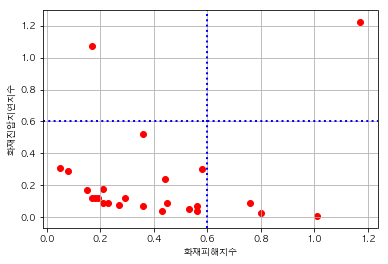

In [138]:
k = pd.DataFrame(df_final_factory_scale['인명피해지수'] + df_final_factory_scale['재산피해지수'],columns = {'화재피해지수'},index = 시군구)
l = pd.DataFrame(df_final_factory_scale['골든타임지수'] + df_final_factory_scale['공장규모지수'],columns = {'화재진압지연지수'},index = 시군구)

m= pd.concat([k,l],axis = 1)

plt.scatter(m['화재피해지수'],m['화재진압지연지수'], color = 'r', marker = 'o')
plt.axhline(y=0.6, color='b', linestyle=':', linewidth=2) #y축 선그리기
plt.axvline(x=0.6, color='b', linestyle=':', linewidth=2) #x축 선그리기
plt.xlabel('화재피해지수')
plt.ylabel('화재진압지연지수')

#plt.colorbar()
plt.grid()
plt.show()

KeyError: '소방서갯수'

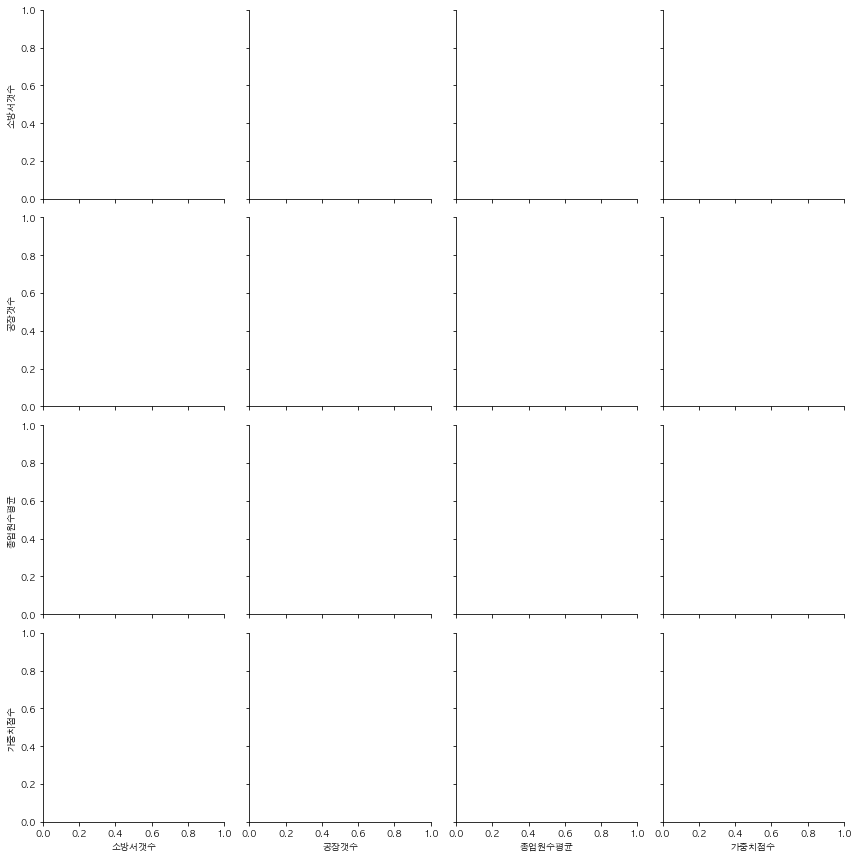

In [121]:
sns.pairplot(df_final_factory_scale, vars=['소방서갯수', '공장갯수', '종업원수평균', '가중치점수'], kind = 'reg', size = 3)
plt.show()

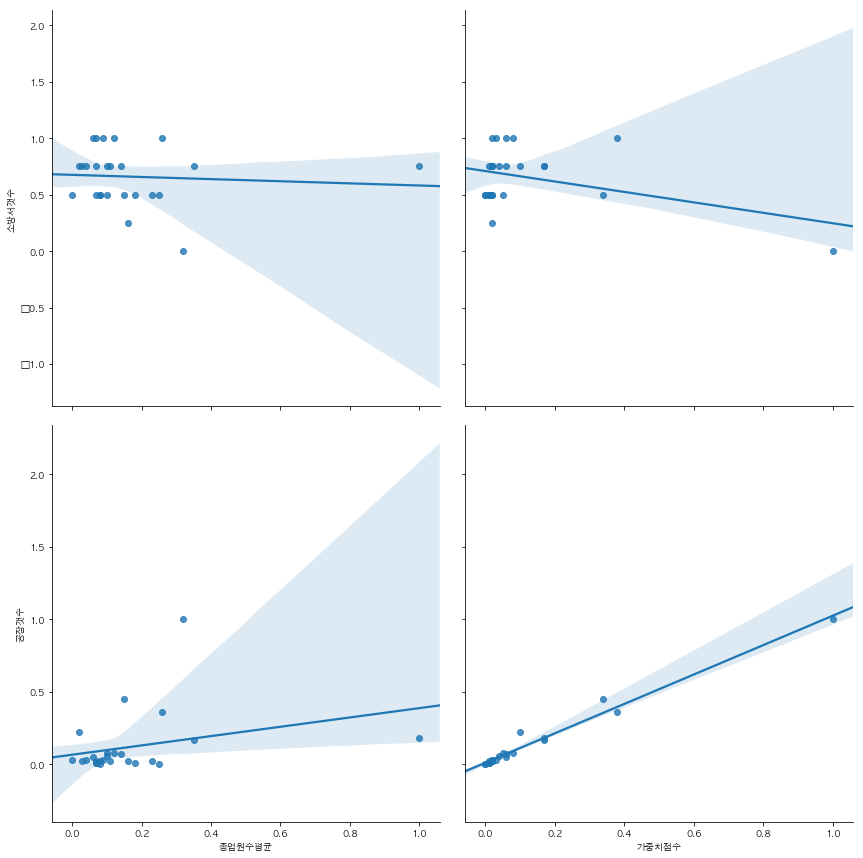

In [73]:
sns.pairplot(df_final_factory_scale, x_vars=["종업원수평균", "가중치점수"], y_vars=["소방서갯수", "공장갯수"], kind = 'reg', size = 6) 
plt.show() 

In [116]:
#히트맵 그리는 법
target_col = ['소방서갯수', '공장갯수', '종업원수평균', '가중치점수']

plt.figure(figsize = (10, 10))
sns.heatmap(df_final_factory_scale[target_col], annot=True, linewidths=.5, cmap='Blues') # fmt='f'
plt.show()
# annot: 각 셀의 값 표시여부
# fmt: annot=True일 경우 숫자 표시 타입 지정

KeyError: "['소방서갯수' '공장갯수' '종업원수평균' '가중치점수'] not in index"

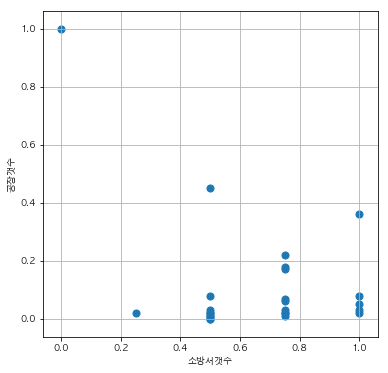

In [75]:
plt.figure(figsize=(6,6))
plt.scatter(df_final_factory_scale['소방서갯수'], df_final_factory_scale['공장갯수'], s=50) # scatter함수 사용. s : 점크기
plt.xlabel('소방서갯수') # x축라벨정함
plt.ylabel('공장갯수') #y축라벨정함, plt.title(‘ ‘) :그래프제목정하기
plt.grid() # 격자무늬 만들기
plt.show()

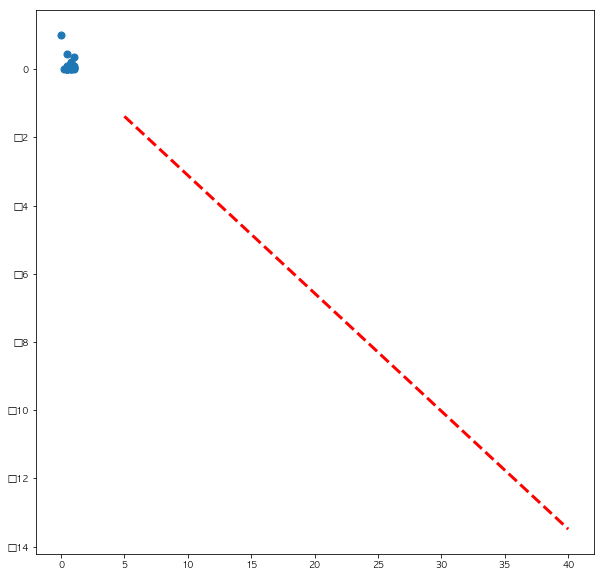

In [76]:
fp1 = np.polyfit(df_final_factory_scale['소방서갯수'], df_final_factory_scale['공장갯수'], 1) # ‘소방서갯수’와 공장갯수의 1차항 회귀계수생성 
fp1 # ([기울기, 절편])
f1 = np.poly1d(fp1) # poly1d: y축 데이터 생성
fx = np.linspace(5, 40, 5) # linespace: x축 데이터 생성 5~40까지 5단위로
plt.figure(figsize=(10,10))
plt.scatter(df_final_factory_scale['소방서갯수'], df_final_factory_scale['공장갯수'], s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'r') # (x값, y값, dashed : 점선, lw : line width, r=빨강)
plt.show()

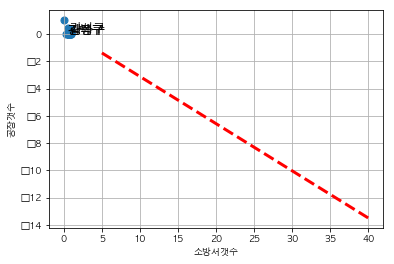

In [78]:
plt.figure(figsize=(14,10))
plt.scatter(df_final_factory_scale['소방서갯수'], df_final_factory_scale['공장갯수'], s=50) 
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')

for n in range(5): #제일 멀리있는 지역 5개 확인
    plt.text(df_final_factory_scale['소방서갯수'][n]*1.02, df_final_factory_scale['공장갯수'][n]*0.98, #글자위치지
             df_final_factory_scale.index[n], fontsize=12)

plt.xlabel('소방서갯수')
plt.ylabel('공장갯수')

#plt.colorbar()
plt.grid()
plt.show()


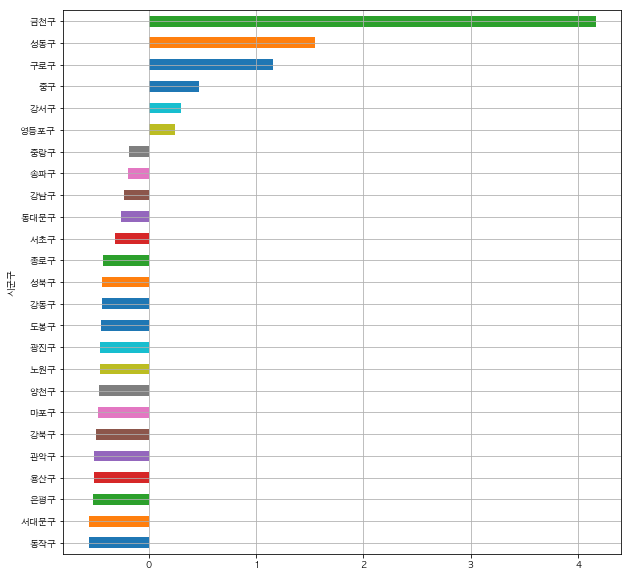

In [71]:
df_final_factory_scale['공장갯수'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10)) #데이터정렬하기
plt.show()

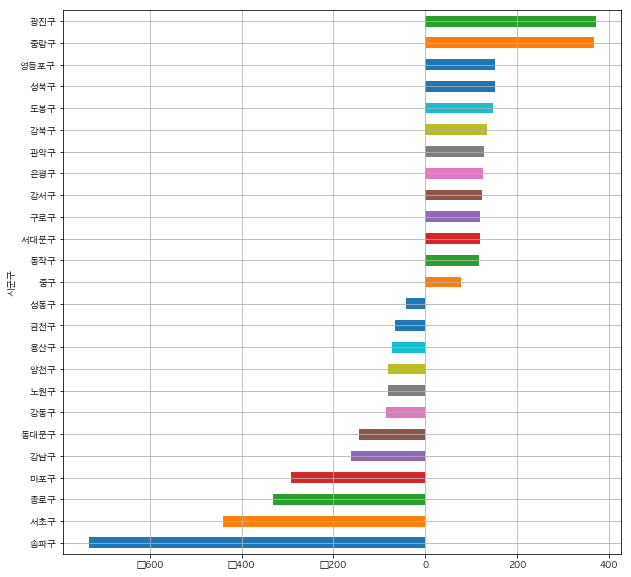

In [72]:
df_final_factory_scale['공장갯수비율'] = df_final_factory_scale['소방서갯수'] / df_final_factory_scale['공장갯수'] *100
df_final_factory_scale['공장갯수비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10)) #데이터 정렬하기
plt.show()